In [1]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
pdir = '/gpfs/home/mep22dku/scratch/SOZONE/PICTURES/CELOS2022/'
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
# import mapfxn as mf
%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
# reload(mf)
import matplotlib.path as mpath


In [2]:
#load nav lat nav lon
basin = nc.Dataset('/gpfs/data/greenocean/software/resources/ModelResources/BasinMasks/clq_basin_masks_ORCA.nc')
nav_lat = basin['Y'][:]
nav_lon = basin['X'][:]

lons = nav_lon[0:37,:]
lats = nav_lat[0:37,:]

In [3]:
## extract and save summer, winter austral summer maps
#1948-2020
now = datetime.now()

yrs = np.arange(1950,2021,1)
yrlen = 71
MO_austral_summer_ts = np.zeros([yrlen,37,182])
MO_austral_winter_ts = np.zeros([yrlen,37,182])

NCEP_austral_summer_ts = np.zeros([yrlen,37,182])
NCEP_austral_winter_ts = np.zeros([yrlen,37,182])

ERA5_austral_summer_ts = np.zeros([yrlen,37,182])
ERA5_austral_winter_ts = np.zeros([yrlen,37,182])

for i in range(0,len(yrs)):
    tyr = yrs[i]
    w = nc.Dataset(f'./averaged_forcing/MetOffice/MetOffice_MONTHLY_SO_wind{tyr}.nc')
    tw = (w['wspd10m'][:,:,:])

    austral_summer = np.zeros([3,37,182]); austral_summer[0,:,:] = tw[0,:,:];
    austral_summer[1,:,:] = tw[1,:,:]; austral_summer[2,:,:] = tw[11,:,:]
    austral_summer_mean = np.nanmean(austral_summer,axis = 0)
    
    austral_winter = np.zeros([3,37,182]); austral_winter[0,:,:] = tw[5,:,:];
    austral_winter[1,:,:] = tw[6,:,:]; austral_winter[2,:,:] = tw[7,:,:]
    austral_winter_mean = np.nanmean(austral_winter,axis = 0)

    MO_austral_summer_ts[i,:,:] = austral_summer_mean
    MO_austral_winter_ts[i,:,:] = austral_winter_mean
    

    w = nc.Dataset(f'./averaged_forcing/NCEP/NCEP_MONTHLY_SO_wind{tyr}.nc')
    tw = (w['wspd10m'][:,:,:])

    austral_summer = np.zeros([3,37,182]); austral_summer[0,:,:] = tw[0,:,:];
    austral_summer[1,:,:] = tw[1,:,:]; austral_summer[2,:,:] = tw[11,:,:]
    austral_summer_mean = np.nanmean(austral_summer,axis = 0)
    
    austral_winter = np.zeros([3,37,182]); austral_winter[0,:,:] = tw[5,:,:];
    austral_winter[1,:,:] = tw[6,:,:]; austral_winter[2,:,:] = tw[7,:,:]
    austral_winter_mean = np.nanmean(austral_winter,axis = 0)

    NCEP_austral_summer_ts[i,:,:] = austral_summer_mean
    NCEP_austral_winter_ts[i,:,:] = austral_winter_mean
    
    w = nc.Dataset(f'./averaged_forcing/ERA5/ERA5_MONTHLY_SO_wind{tyr}.nc')
    tw = (w['wspd10m'][:,:,:])

    austral_summer = np.zeros([3,37,182]); austral_summer[0,:,:] = tw[0,:,:];
    austral_summer[1,:,:] = tw[1,:,:]; austral_summer[2,:,:] = tw[11,:,:]
    austral_summer_mean = np.nanmean(austral_summer,axis = 0)
    
    austral_winter = np.zeros([3,37,182]); austral_winter[0,:,:] = tw[5,:,:];
    austral_winter[1,:,:] = tw[6,:,:]; austral_winter[2,:,:] = tw[7,:,:]
    austral_winter_mean = np.nanmean(austral_winter,axis = 0)

    ERA5_austral_summer_ts[i,:,:] = austral_summer_mean
    ERA5_austral_winter_ts[i,:,:] = austral_winter_mean
now2 = datetime.now()
print(now2-now)

0:00:08.059085


In [4]:
## extract and save spring, autumn austral spring maps
#1948-2020
now = datetime.now()

yrs = np.arange(1950,2021,1)
yrlen = 71
MO_austral_spring_ts = np.zeros([yrlen,37,182])
MO_austral_autumn_ts = np.zeros([yrlen,37,182])

NCEP_austral_spring_ts = np.zeros([yrlen,37,182])
NCEP_austral_autumn_ts = np.zeros([yrlen,37,182])

ERA5_austral_spring_ts = np.zeros([yrlen,37,182])
ERA5_austral_autumn_ts = np.zeros([yrlen,37,182])

for i in range(0,len(yrs)):
    tyr = yrs[i]
    w = nc.Dataset(f'./averaged_forcing/MetOffice/MetOffice_MONTHLY_SO_wind{tyr}.nc')
    tw = (w['wspd10m'][:,:,:])

    austral_spring = np.zeros([3,37,182]); austral_spring[0,:,:] = tw[8,:,:];
    austral_spring[1,:,:] = tw[9,:,:]; austral_spring[2,:,:] = tw[10,:,:]
    austral_spring_mean = np.nanmean(austral_spring,axis = 0)
    
    austral_autumn = np.zeros([3,37,182]); austral_autumn[0,:,:] = tw[2,:,:];
    austral_autumn[1,:,:] = tw[3,:,:]; austral_autumn[2,:,:] = tw[4,:,:]
    austral_autumn_mean = np.nanmean(austral_autumn,axis = 0)

    MO_austral_spring_ts[i,:,:] = austral_spring_mean
    MO_austral_autumn_ts[i,:,:] = austral_autumn_mean
    

    w = nc.Dataset(f'./averaged_forcing/NCEP/NCEP_MONTHLY_SO_wind{tyr}.nc')
    tw = (w['wspd10m'][:,:,:])

    austral_spring = np.zeros([3,37,182]); austral_spring[0,:,:] = tw[8,:,:];
    austral_spring[1,:,:] = tw[9,:,:]; austral_spring[2,:,:] = tw[10,:,:]
    austral_spring_mean = np.nanmean(austral_spring,axis = 0)
    
    austral_autumn = np.zeros([3,37,182]); austral_autumn[0,:,:] = tw[2,:,:];
    austral_autumn[1,:,:] = tw[3,:,:]; austral_autumn[2,:,:] = tw[4,:,:]
    austral_autumn_mean = np.nanmean(austral_autumn,axis = 0)

    NCEP_austral_spring_ts[i,:,:] = austral_spring_mean
    NCEP_austral_autumn_ts[i,:,:] = austral_autumn_mean
    
    w = nc.Dataset(f'./averaged_forcing/ERA5/ERA5_MONTHLY_SO_wind{tyr}.nc')
    tw = (w['wspd10m'][:,:,:])

    austral_spring = np.zeros([3,37,182]); austral_spring[0,:,:] = tw[8,:,:];
    austral_spring[1,:,:] = tw[9,:,:]; austral_spring[2,:,:] = tw[10,:,:]
    austral_spring_mean = np.nanmean(austral_spring,axis = 0)
    
    austral_autumn = np.zeros([3,37,182]); austral_autumn[0,:,:] = tw[2,:,:];
    austral_autumn[1,:,:] = tw[3,:,:]; austral_autumn[2,:,:] = tw[4,:,:]
    austral_autumn_mean = np.nanmean(austral_autumn,axis = 0)

    ERA5_austral_spring_ts[i,:,:] = austral_spring_mean
    ERA5_austral_autumn_ts[i,:,:] = austral_autumn_mean
now2 = datetime.now()
print(now2-now)

0:00:00.751650


In [5]:
now2 = datetime.now()
print(now2)

2022-07-11 11:04:51.247138


In [6]:
now3 = datetime.now()
print(now3-now2)

0:00:00.014493


In [7]:
NCEP_austral_summer_clim = np.nanmean(NCEP_austral_summer_ts,axis = 0)
NCEP_austral_summer_decs = np.zeros([7,37,182])
dec_start_inds = np.arange(0,70,10)
decs = np.arange(1950,2030,10)
print(decs)
print(np.shape(dec_start_inds))
for i in range(0,7):
    ds = dec_start_inds[i]
    NCEP_austral_summer_decs[i,:,:] = np.nanmean(NCEP_austral_summer_ts[ds:ds+10,:,:], axis = 0)
NCEP_austral_winter_clim = np.nanmean(NCEP_austral_winter_ts,axis = 0)
NCEP_austral_winter_decs = np.zeros([7,37,182])
dec_start_inds = np.arange(2,72,10)
decs = np.arange(1950,2030,10)
print(decs)
print(np.shape(dec_start_inds))
for i in range(0,7):
    ds = dec_start_inds[i]
    NCEP_austral_winter_decs[i,:,:] = np.nanmean(NCEP_austral_winter_ts[ds:ds+10,:,:], axis = 0)
#####
MO_austral_summer_clim = np.nanmean(MO_austral_summer_ts,axis = 0)
MO_austral_summer_decs = np.zeros([7,37,182])
dec_start_inds = np.arange(2,72,10)
decs = np.arange(1950,2030,10)
print(decs)
print(np.shape(dec_start_inds))
for i in range(0,7):
    ds = dec_start_inds[i]
    MO_austral_summer_decs[i,:,:] = np.nanmean(MO_austral_summer_ts[ds:ds+10,:,:], axis = 0)
MO_austral_winter_clim = np.nanmean(MO_austral_winter_ts,axis = 0)
MO_austral_winter_decs = np.zeros([7,37,182])
dec_start_inds = np.arange(2,72,10)
decs = np.arange(1950,2030,10)
print(decs)
print(np.shape(dec_start_inds))
for i in range(0,7):
    ds = dec_start_inds[i]
    MO_austral_winter_decs[i,:,:] = np.nanmean(MO_austral_winter_ts[ds:ds+10,:,:], axis = 0)
    #####
ERA5_austral_summer_clim = np.nanmean(ERA5_austral_summer_ts,axis = 0)
ERA5_austral_summer_decs = np.zeros([7,37,182])
dec_start_inds = np.arange(2,72,10)
decs = np.arange(1950,2030,10)
print(decs)
print(np.shape(dec_start_inds))
for i in range(0,7):
    ds = dec_start_inds[i]
    ERA5_austral_summer_decs[i,:,:] = np.nanmean(ERA5_austral_summer_ts[ds:ds+10,:,:], axis = 0)
ERA5_austral_winter_clim = np.nanmean(ERA5_austral_winter_ts,axis = 0)
ERA5_austral_winter_decs = np.zeros([7,37,182])
dec_start_inds = np.arange(2,72,10)
decs = np.arange(1950,2030,10)
print(decs)
print(np.shape(dec_start_inds))
for i in range(0,7):
    ds = dec_start_inds[i]
    ERA5_austral_winter_decs[i,:,:] = np.nanmean(ERA5_austral_winter_ts[ds:ds+10,:,:], axis = 0)

[1950 1960 1970 1980 1990 2000 2010 2020]
(7,)
[1950 1960 1970 1980 1990 2000 2010 2020]
(7,)
[1950 1960 1970 1980 1990 2000 2010 2020]
(7,)
[1950 1960 1970 1980 1990 2000 2010 2020]
(7,)
[1950 1960 1970 1980 1990 2000 2010 2020]
(7,)
[1950 1960 1970 1980 1990 2000 2010 2020]
(7,)


In [8]:
NCEP_austral_spring_clim = np.nanmean(NCEP_austral_spring_ts,axis = 0)
NCEP_austral_spring_decs = np.zeros([7,37,182])
dec_start_inds = np.arange(0,70,10)
decs = np.arange(1950,2030,10)
print(decs)
print(np.shape(dec_start_inds))
for i in range(0,7):
    ds = dec_start_inds[i]
    NCEP_austral_spring_decs[i,:,:] = np.nanmean(NCEP_austral_spring_ts[ds:ds+10,:,:], axis = 0)
NCEP_austral_autumn_clim = np.nanmean(NCEP_austral_autumn_ts,axis = 0)
NCEP_austral_autumn_decs = np.zeros([7,37,182])
dec_start_inds = np.arange(2,72,10)
decs = np.arange(1950,2030,10)
print(decs)
print(np.shape(dec_start_inds))
for i in range(0,7):
    ds = dec_start_inds[i]
    NCEP_austral_autumn_decs[i,:,:] = np.nanmean(NCEP_austral_autumn_ts[ds:ds+10,:,:], axis = 0)
#####
MO_austral_spring_clim = np.nanmean(MO_austral_spring_ts,axis = 0)
MO_austral_spring_decs = np.zeros([7,37,182])
dec_start_inds = np.arange(2,72,10)
decs = np.arange(1950,2030,10)
print(decs)
print(np.shape(dec_start_inds))
for i in range(0,7):
    ds = dec_start_inds[i]
    MO_austral_spring_decs[i,:,:] = np.nanmean(MO_austral_spring_ts[ds:ds+10,:,:], axis = 0)
MO_austral_autumn_clim = np.nanmean(MO_austral_autumn_ts,axis = 0)
MO_austral_autumn_decs = np.zeros([7,37,182])
dec_start_inds = np.arange(2,72,10)
decs = np.arange(1950,2030,10)
print(decs)
print(np.shape(dec_start_inds))
for i in range(0,7):
    ds = dec_start_inds[i]
    MO_austral_autumn_decs[i,:,:] = np.nanmean(MO_austral_autumn_ts[ds:ds+10,:,:], axis = 0)
    #####
ERA5_austral_spring_clim = np.nanmean(ERA5_austral_spring_ts,axis = 0)
ERA5_austral_spring_decs = np.zeros([7,37,182])
dec_start_inds = np.arange(2,72,10)
decs = np.arange(1950,2030,10)
print(decs)
print(np.shape(dec_start_inds))
for i in range(0,7):
    ds = dec_start_inds[i]
    ERA5_austral_spring_decs[i,:,:] = np.nanmean(ERA5_austral_spring_ts[ds:ds+10,:,:], axis = 0)
ERA5_austral_autumn_clim = np.nanmean(ERA5_austral_autumn_ts,axis = 0)
ERA5_austral_autumn_decs = np.zeros([7,37,182])
dec_start_inds = np.arange(2,72,10)
decs = np.arange(1950,2030,10)
print(decs)
print(np.shape(dec_start_inds))
for i in range(0,7):
    ds = dec_start_inds[i]
    ERA5_austral_autumn_decs[i,:,:] = np.nanmean(ERA5_austral_autumn_ts[ds:ds+10,:,:], axis = 0)

[1950 1960 1970 1980 1990 2000 2010 2020]
(7,)
[1950 1960 1970 1980 1990 2000 2010 2020]
(7,)
[1950 1960 1970 1980 1990 2000 2010 2020]
(7,)
[1950 1960 1970 1980 1990 2000 2010 2020]
(7,)
[1950 1960 1970 1980 1990 2000 2010 2020]
(7,)
[1950 1960 1970 1980 1990 2000 2010 2020]
(7,)


In [22]:
def plot_southern(fig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, tticks, northex = -50, fs = 12, 
                  tit = '', cbarlab = '', tcmap = 'viridis', lm = True, cbr = True):
   
    ax1.set_extent([-180, 180, -80, -45], ccrs.PlateCarree())
    #make that circle
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax1.set_boundary(circle, transform=ax1.transAxes)
    lons = nav_lon[0:37,:]; lats = nav_lat[0:37,:]; 
    mesh = ax1.pcolormesh(lons, lats, tdat, cmap = tcmap, vmin = tvmin, vmax = tvmax,
                     transform=ccrs.PlateCarree())
    ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', 
                                                 edgecolor='face', facecolor='k'))
    ax1.set_title(tit, fontsize = fs)
    cb = 0
    if cbr:
        cb = fig.colorbar(mesh, ax = ax1, orientation = 'horizontal',
                     pad = 0.06, fraction = 0.045, shrink = 0.9)
        cb.set_label(label=cbarlab,fontsize = fs)
        cb.set_ticks(tticks, fontsize = 105)
        cb.ax.tick_params(labelsize=16)
    return cb

(71, 37, 182)


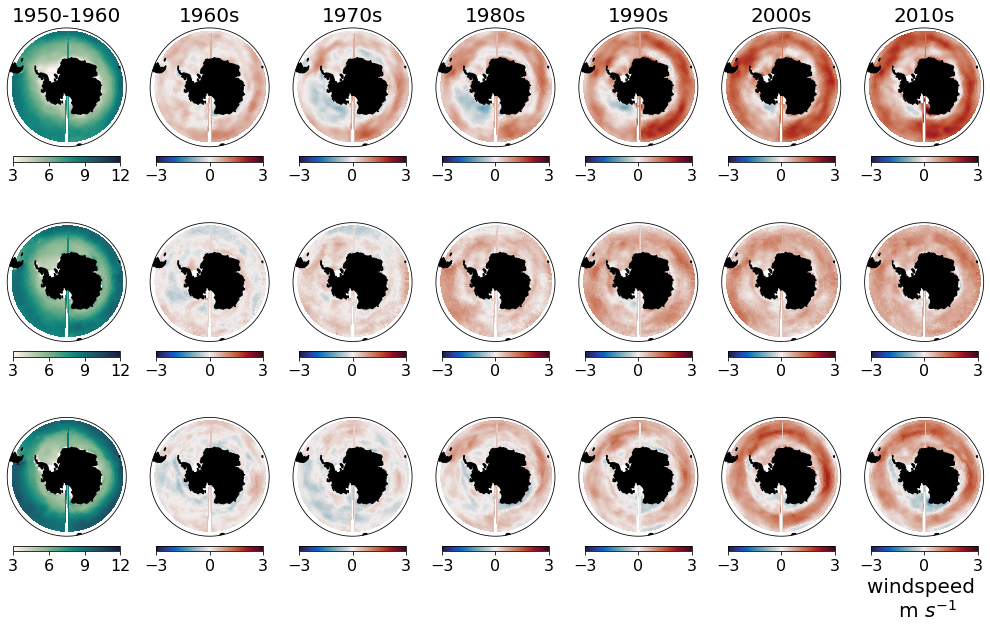

In [35]:
tvmin = 3; tvmax = 12
print(np.shape(NCEP_austral_summer_ts))
tfs = 20


fact = 0.7
tfig = plt.figure(figsize=[25*fact, 14.5*fact])
ax1 = tfig.add_subplot(3, 7, 1, projection=ccrs.Orthographic(0, -90))
tdat = NCEP_austral_summer_decs[0,:,:]
ticks = [3,6,9,12]
cb = plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, ticks, northex = -50, fs = tfs, 
                  tit = '1950-1960', 
              cbarlab = '', tcmap = cm.tempo, lm = True)

dt = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
ticks = [-3, 0, 3]
for i in range(2,8):
    tdec = NCEP_austral_summer_decs[i-1,:,:]
    clim = NCEP_austral_summer_decs[0,:,:]
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 7, i, projection=ccrs.Orthographic(0, -90))
    cb = plot_southern(tfig, ax1, lons, lats, tdat, -3, 
                      3, ticks, northex = -50, fs = tfs,
                      tit = f'{dt[i-2]}', cbarlab = '', tcmap = cm.balance, lm = True, cbr = True)
ticks = [3,6,9,12]
ax1 = tfig.add_subplot(3, 7, 8, projection=ccrs.Orthographic(0, -90))
tdat = ERA5_austral_summer_decs[0,:,:]
cb = plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, ticks, northex = -50, fs = tfs,
                  tit = '', 
              cbarlab = '', tcmap = cm.tempo, lm = True, cbr = True)
ticks = [-3, 0, 3]
for i in range(9,15):
    ti = i-8
    tdec = ERA5_austral_summer_decs[ti,:,:]
    clim = ERA5_austral_summer_decs[0,:,:]
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 7, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -3, 
                      3, ticks, northex = -50, fs = tfs,
                      tit = f'', cbarlab = '', tcmap = cm.balance, lm = True, cbr = True)


ticks = [3,6,9,12]
ax1 = tfig.add_subplot(3, 7, 15, projection=ccrs.Orthographic(0, -90))
tdat = MO_austral_summer_decs[0,:,:]
plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, ticks, northex = -50, fs = tfs,
                  tit = '', 
              cbarlab = '', tcmap = cm.tempo, lm = True, cbr = True)
ticks = [-3, 0, 3]
for i in range(16,21):
    ti = i-15
    tdec = MO_austral_summer_decs[ti,:,:]
    clim = MO_austral_summer_decs[0,:,:]
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 7, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -3, 
                      3, ticks, northex = -50, fs = tfs,
                      tit = f'', cbarlab = '', tcmap = cm.balance, lm = True, cbr = True)
    
for i in range(21,22):
    ti = i-15
    tdec = MO_austral_summer_decs[ti,:,:]
    clim = MO_austral_summer_decs[0,:,:]
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 7, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -3, 
                      3, ticks, northex = -50, fs = tfs,
                      tit = f'', cbarlab = 'windspeed \n m $s^{-1}$', tcmap = cm.balance, lm = True)
plt.tight_layout()
    #plt.subplots_adjust(left=0.2, bottom=0.2, right=1, top=1, wspace=0.2, hspace=0)
#tfig.savefig(f'/{pdir}/summer_clim.png')
    


(71, 37, 182)


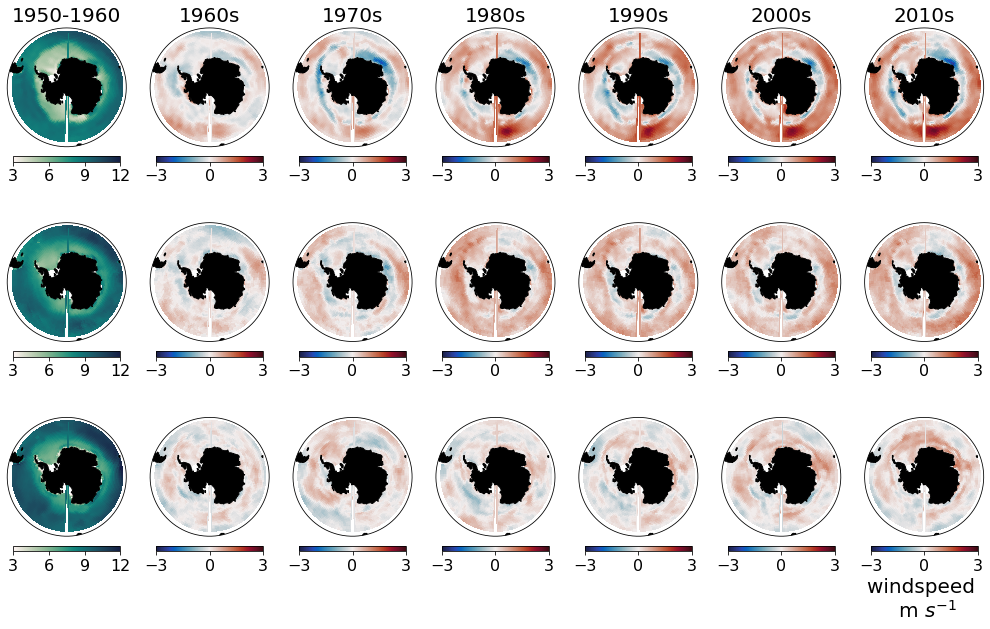

In [36]:
tvmin = 3; tvmax = 12
print(np.shape(NCEP_austral_winter_ts))
tfs = 20


fact = 0.7
tfig = plt.figure(figsize=[25*fact, 14.5*fact])
ax1 = tfig.add_subplot(3, 7, 1, projection=ccrs.Orthographic(0, -90))
tdat = NCEP_austral_winter_decs[0,:,:]
ticks = [3,6,9,12]
cb = plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, ticks, northex = -50, fs = tfs, 
                  tit = '1950-1960', 
              cbarlab = '', tcmap = cm.tempo, lm = True)

dt = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
ticks = [-3, 0, 3]
for i in range(2,8):
    tdec = NCEP_austral_winter_decs[i-1,:,:]
    clim = NCEP_austral_winter_decs[0,:,:]
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 7, i, projection=ccrs.Orthographic(0, -90))
    cb = plot_southern(tfig, ax1, lons, lats, tdat, -3, 
                      3, ticks, northex = -50, fs = tfs,
                      tit = f'{dt[i-2]}', cbarlab = '', tcmap = cm.balance, lm = True, cbr = True)
ticks = [3,6,9,12]
ax1 = tfig.add_subplot(3, 7, 8, projection=ccrs.Orthographic(0, -90))
tdat = ERA5_austral_winter_decs[0,:,:]
cb = plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, ticks, northex = -50, fs = tfs,
                  tit = '', 
              cbarlab = '', tcmap = cm.tempo, lm = True, cbr = True)
ticks = [-3, 0, 3]
for i in range(9,15):
    ti = i-8
    tdec = ERA5_austral_winter_decs[ti,:,:]
    clim = ERA5_austral_winter_decs[0,:,:]
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 7, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -3, 
                      3, ticks, northex = -50, fs = tfs,
                      tit = f'', cbarlab = '', tcmap = cm.balance, lm = True, cbr = True)


ticks = [3,6,9,12]
ax1 = tfig.add_subplot(3, 7, 15, projection=ccrs.Orthographic(0, -90))
tdat = MO_austral_winter_decs[0,:,:]
plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, ticks, northex = -50, fs = tfs,
                  tit = '', 
              cbarlab = '', tcmap = cm.tempo, lm = True, cbr = True)
ticks = [-3, 0, 3]
for i in range(16,21):
    ti = i-15
    tdec = MO_austral_winter_decs[ti,:,:]
    clim = MO_austral_winter_decs[0,:,:]
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 7, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -3, 
                      3, ticks, northex = -50, fs = tfs,
                      tit = f'', cbarlab = '', tcmap = cm.balance, lm = True, cbr = True)
    
for i in range(21,22):
    ti = i-15
    tdec = MO_austral_winter_decs[ti,:,:]
    clim = MO_austral_winter_decs[0,:,:]
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 7, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -3, 
                      3, ticks, northex = -50, fs = tfs,
                      tit = f'', cbarlab = 'windspeed \n m $s^{-1}$', tcmap = cm.balance, lm = True)
plt.tight_layout()
    #plt.subplots_adjust(left=0.2, bottom=0.2, right=1, top=1, wspace=0.2, hspace=0)
#tfig.savefig(f'/{pdir}/winter_clim.png')
    


(71, 37, 182)


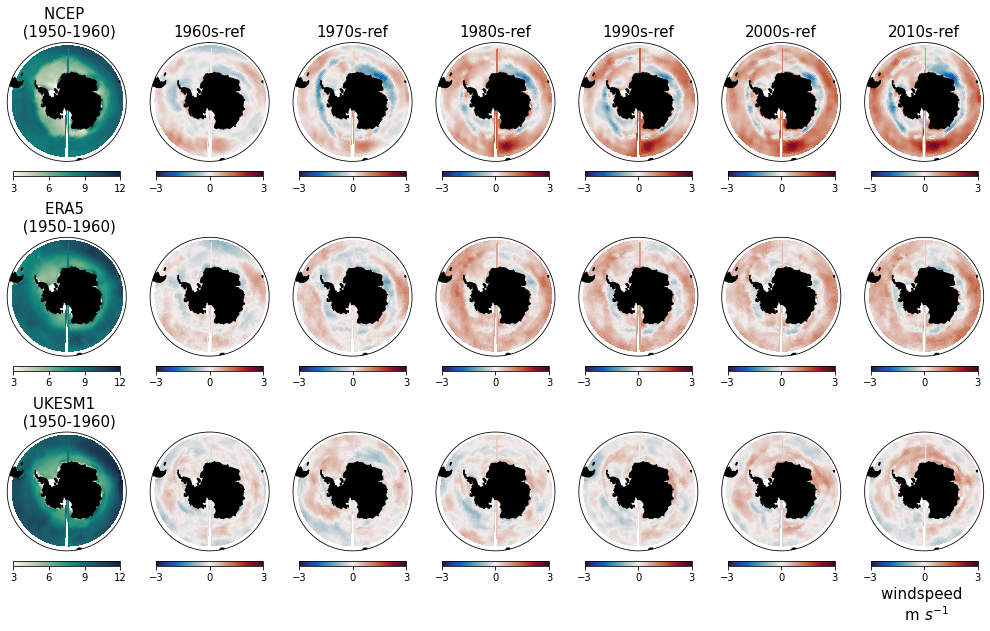

In [11]:
tvmin = 3; tvmax = 12
print(np.shape(NCEP_austral_winter_ts))
tfs = 15


fact = 0.7
tfig = plt.figure(figsize=[25*fact, 14.5*fact])
ax1 = tfig.add_subplot(3, 7, 1, projection=ccrs.Orthographic(0, -90))
tdat = NCEP_austral_winter_decs[0,:,:]
ticks = [3,6,9,12]
plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, ticks, northex = -50, fs = tfs, 
                  tit = 'NCEP \n (1950-1960)', 
              cbarlab = '', tcmap = cm.tempo, lm = True)

dt = ['1960s-ref', '1970s-ref', '1980s-ref', '1990s-ref', '2000s-ref', '2010s-ref']
ticks = [-3, 0, 3]
for i in range(2,8):
    tdec = NCEP_austral_winter_decs[i-1,:,:]
    clim = NCEP_austral_winter_decs[0,:,:]
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 7, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -3, 
                      3, ticks, northex = -50, fs = tfs,
                      tit = f'{dt[i-2]}', cbarlab = '', tcmap = cm.balance, lm = True)
ticks = [3,6,9,12]
ax1 = tfig.add_subplot(3, 7, 8, projection=ccrs.Orthographic(0, -90))
tdat = ERA5_austral_winter_decs[0,:,:]
plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, ticks, northex = -50, fs = tfs,
                  tit = 'ERA5 \n (1950-1960)', 
              cbarlab = '', tcmap = cm.tempo, lm = True)
ticks = [-3, 0, 3]
for i in range(9,15):
    ti = i-8
    tdec = ERA5_austral_winter_decs[ti,:,:]
    clim = ERA5_austral_winter_decs[0,:,:]
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 7, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -3, 
                      3, ticks, northex = -50, fs = tfs,
                      tit = f'', cbarlab = '', tcmap = cm.balance, lm = True)


ticks = [3,6,9,12]
ax1 = tfig.add_subplot(3, 7, 15, projection=ccrs.Orthographic(0, -90))
tdat = MO_austral_winter_decs[0,:,:]
plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, ticks, northex = -50, fs = tfs,
                  tit = 'UKESM1 \n (1950-1960)', 
              cbarlab = '', tcmap = cm.tempo, lm = True)
ticks = [-3, 0, 3]
for i in range(16,21):
    ti = i-15
    tdec = MO_austral_winter_decs[ti,:,:]
    clim = MO_austral_winter_decs[0,:,:]
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 7, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -3, 
                      3, ticks, northex = -50, fs = tfs,
                      tit = f'', cbarlab = '', tcmap = cm.balance, lm = True)
    
for i in range(21,22):
    ti = i-15
    tdec = MO_austral_winter_decs[ti,:,:]
    clim = MO_austral_winter_decs[0,:,:]
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 7, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -3, 
                      3, ticks, northex = -50, fs = tfs,
                      tit = f'', cbarlab = 'windspeed \n m $s^{-1}$', tcmap = cm.balance, lm = True)
#tfig.savefig(f'/{pdir}/winter_clim.png')
    


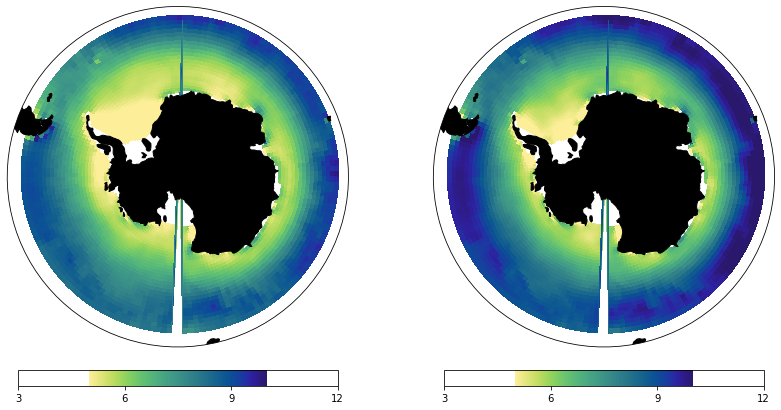

In [12]:
ticks = [3,6,9,12]
tfig = plt.figure(figsize=[20*fact, 10*fact])

tm = 5; tx = 10
tdat = ERA5_austral_summer_decs[0,:,:]
ax1 = tfig.add_subplot(1, 2, 1, projection=ccrs.Orthographic(0, -90))
plot_southern(tfig, ax1, lons, lats, tdat, tm, 
                  tx, ticks, northex = -50, fs = tfs,
                  tit = f'', cbarlab = '', tcmap = cm.haline_r, lm = True)

tdat = ERA5_austral_summer_decs[6,:,:]
ax1 = tfig.add_subplot(1, 2, 2, projection=ccrs.Orthographic(0, -90))
plot_southern(tfig, ax1, lons, lats, tdat, tm, 
                  tx, ticks, northex = -50, fs = tfs,
                  tit = f'', cbarlab = '', tcmap = cm.haline_r, lm = True)

(71, 37, 182)


TypeError: plot_southern() missing 1 required positional argument: 'tticks'

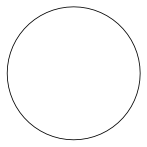

In [13]:
tvmin = 2; tvmax = 12
print(np.shape(NCEP_austral_winter_ts))
fs = 12


fact = 0.8
tfig = plt.figure(figsize=[28*fact, 10*fact])
ax1 = tfig.add_subplot(2, 8, 1, projection=ccrs.Orthographic(0, -90))
tdat = NCEP_austral_winter_clim
plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, northex = -50, fs = 12,
                  tit = 'NCEP winter wspd clim. \n (1948-2020)', 
              cbarlab = 'wspd m s$^-1$', tcmap = 'viridis', lm = True)

for i in range(2,9):
    tdec = NCEP_austral_winter_decs[i-2,:,:]
    clim = NCEP_austral_winter_clim
    tdat = tdec - clim
    ax1 = tfig.add_subplot(2, 8, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -2, 
                      2, northex = -50, fs = 12,
                      tit = f'{decs[i-2]}s - clim', cbarlab = '', tcmap = cm.balance, lm = True)

    
ax1 = tfig.add_subplot(2, 8, 9, projection=ccrs.Orthographic(0, -90))
tdat = MO_austral_winter_clim
plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, northex = -50, fs = 12,
                  tit = 'MO winter wspd clim. \n (1948-2020)', 
              cbarlab = 'wspd m s$^{-1}$', tcmap = 'viridis', lm = True)

for i in range(10,17):
    tdec = MO_austral_winter_decs[i-10,:,:]
    clim = MO_austral_winter_clim
    tdat = tdec - clim
    ax1 = tfig.add_subplot(2, 8, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -2, 
                      2, northex = -50, fs = 12,
                      tit = f'{decs[i-10]}s - clim', cbarlab = 'wspd m s$^{-1}$', tcmap = cm.balance, lm = True)
    
    


In [ ]:
tvmin = 2; tvmax = 12
print(np.shape(NCEP_austral_winter_ts))
fs = 12


fact = 0.7
tfig = plt.figure(figsize=[28*fact, 17*fact])
ax1 = tfig.add_subplot(3, 8, 1, projection=ccrs.Orthographic(0, -90))
tdat = NCEP_austral_winter_clim
plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, northex = -50, fs = 12,
                  tit = 'NCEP winter wspd clim. \n (1950-2020)', 
              cbarlab = 'wspd m s$^-1$', tcmap = 'viridis', lm = True)

for i in range(2,9):
    tdec = NCEP_austral_winter_decs[i-2,:,:]
    clim = NCEP_austral_winter_clim
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 8, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -2, 
                      2, northex = -50, fs = 12,
                      tit = f'{decs[i-2]}s - clim', cbarlab = '', tcmap = cm.balance, lm = True)

    
ax1 = tfig.add_subplot(3, 8, 9, projection=ccrs.Orthographic(0, -90))
tdat = MO_austral_winter_clim
plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, northex = -50, fs = 12,
                  tit = 'MO winter wspd clim. \n (1950-2020)', 
              cbarlab = 'wspd m s$^{-1}$', tcmap = 'viridis', lm = True)

for i in range(10,17):
    tdec = MO_austral_winter_decs[i-10,:,:]
    clim = MO_austral_winter_clim
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 8, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -2, 
                      2, northex = -50, fs = 12,
                      tit = f'{decs[i-10]}s - clim', cbarlab = 'wspd m s$^{-1}$', tcmap = cm.balance, lm = True)

ax1 = tfig.add_subplot(3, 8, 17, projection=ccrs.Orthographic(0, -90))
tdat = ERA5_austral_winter_clim
plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, northex = -50, fs = 12,
                  tit = 'ERA5 winter wspd clim. \n (1950-2020)', 
              cbarlab = 'wspd m s$^{-1}$', tcmap = 'viridis', lm = True)

for i in range(18,25):
    tdec = ERA5_austral_winter_decs[i-18,:,:]
    clim = ERA5_austral_winter_clim
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 8, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -2, 
                      2, northex = -50, fs = 12,
                      tit = f'{decs[i-18]}s - clim', cbarlab = 'wspd m s$^{-1}$', tcmap = cm.balance, lm = True)

pdir = '/gpfs/home/mep22dku/scratch/SOZONE/PICTURES/CELOS2022/'    
tfig.savefig(f'/{pdir}/winclim.png')
    


In [ ]:
tvmin = 2; tvmax = 12
print(np.shape(NCEP_austral_autumn_ts))
fs = 12


fact = 0.8
tfig = plt.figure(figsize=[28*fact, 17*fact])
ax1 = tfig.add_subplot(3, 8, 1, projection=ccrs.Orthographic(0, -90))
tdat = NCEP_austral_autumn_clim
plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, northex = -50, fs = 12,
                  tit = 'NCEP autumn wspd clim. \n (1950-2020)', 
              cbarlab = 'wspd m s$^-1$', tcmap = 'viridis', lm = True)

for i in range(2,9):
    tdec = NCEP_austral_autumn_decs[i-2,:,:]
    clim = NCEP_austral_autumn_clim
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 8, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -2, 
                      2, northex = -50, fs = 12,
                      tit = f'{decs[i-2]}s - clim', cbarlab = '', tcmap = cm.balance, lm = True)

    
ax1 = tfig.add_subplot(3, 8, 9, projection=ccrs.Orthographic(0, -90))
tdat = MO_austral_autumn_clim
plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, northex = -50, fs = 12,
                  tit = 'MO autumn wspd clim. \n (1950-2020)', 
              cbarlab = 'wspd m s$^{-1}$', tcmap = 'viridis', lm = True)

for i in range(10,17):
    tdec = MO_austral_autumn_decs[i-10,:,:]
    clim = MO_austral_autumn_clim
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 8, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -2, 
                      2, northex = -50, fs = 12,
                      tit = f'{decs[i-10]}s - clim', cbarlab = 'wspd m s$^{-1}$', tcmap = cm.balance, lm = True)

ax1 = tfig.add_subplot(3, 8, 17, projection=ccrs.Orthographic(0, -90))
tdat = ERA5_austral_autumn_clim
plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, northex = -50, fs = 12,
                  tit = 'ERA5 autumn wspd clim. \n (1950-2020)', 
              cbarlab = 'wspd m s$^{-1}$', tcmap = 'viridis', lm = True)

for i in range(18,25):
    tdec = ERA5_austral_autumn_decs[i-18,:,:]
    clim = ERA5_austral_autumn_clim
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 8, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -2, 
                      2, northex = -50, fs = 12,
                      tit = f'{decs[i-18]}s - clim', cbarlab = 'wspd m s$^{-1}$', tcmap = cm.balance, lm = True)
    
#tfig.savefig('sumclim.png')
    


In [ ]:
tvmin = 2; tvmax = 12
print(np.shape(NCEP_austral_spring_ts))
fs = 12


fact = 0.8
tfig = plt.figure(figsize=[28*fact, 17*fact])
ax1 = tfig.add_subplot(3, 8, 1, projection=ccrs.Orthographic(0, -90))
tdat = NCEP_austral_spring_clim
plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, northex = -50, fs = 12,
                  tit = 'NCEP spring wspd clim. \n (1950-2020)', 
              cbarlab = 'wspd m s$^-1$', tcmap = 'viridis', lm = True)

for i in range(2,9):
    tdec = NCEP_austral_spring_decs[i-2,:,:]
    clim = NCEP_austral_spring_clim
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 8, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -2, 
                      2, northex = -50, fs = 12,
                      tit = f'{decs[i-2]}s - clim', cbarlab = '', tcmap = cm.balance, lm = True)

    
ax1 = tfig.add_subplot(3, 8, 9, projection=ccrs.Orthographic(0, -90))
tdat = MO_austral_spring_clim
plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, northex = -50, fs = 12,
                  tit = 'MO spring wspd clim. \n (1950-2020)', 
              cbarlab = 'wspd m s$^{-1}$', tcmap = 'viridis', lm = True)

for i in range(10,17):
    tdec = MO_austral_spring_decs[i-10,:,:]
    clim = MO_austral_spring_clim
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 8, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -2, 
                      2, northex = -50, fs = 12,
                      tit = f'{decs[i-10]}s - clim', cbarlab = 'wspd m s$^{-1}$', tcmap = cm.balance, lm = True)

ax1 = tfig.add_subplot(3, 8, 17, projection=ccrs.Orthographic(0, -90))
tdat = ERA5_austral_spring_clim
plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, northex = -50, fs = 12,
                  tit = 'ERA5 spring wspd clim. \n (1950-2020)', 
              cbarlab = 'wspd m s$^{-1}$', tcmap = 'viridis', lm = True)

for i in range(18,25):
    tdec = ERA5_austral_spring_decs[i-18,:,:]
    clim = ERA5_austral_spring_clim
    tdat = tdec - clim
    ax1 = tfig.add_subplot(3, 8, i, projection=ccrs.Orthographic(0, -90))
    plot_southern(tfig, ax1, lons, lats, tdat, -2, 
                      2, northex = -50, fs = 12,
                      tit = f'{decs[i-18]}s - clim', cbarlab = 'wspd m s$^{-1}$', tcmap = cm.balance, lm = True)
    
#tfig.savefig('sumclim.png')
    
